## Import libraries

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

np.random.seed(1234)
tf.random.set_seed(1234)
plt.rcParams["font.family"] = "serif"

2024-10-21 10:28:45.557625: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-21 10:28:46.113063: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/azharctp/miniconda3/envs/tf/lib/
2024-10-21 10:28:46.117398: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/azharctp/miniconda3/envs/tf/lib/
2024-10-21 10:28:46.117407: W tensorflow/compiler/

## Loading models

In [2]:
reference_model = tf.keras.models.load_model('Reference_model')
pretrained_model = tf.keras.models.load_model('Pretrained_model')
transfer_learned_model = tf.keras.models.load_model('Transfer_learned_model')

R = 15.05

X,Y,Z = np.meshgrid(np.linspace(-10*R,25*R,1001),np.array([0]),np.array([35]))
test_data = np.hstack((X.flatten()[:, None], Y.flatten()[:, None], Z.flatten()[:, None]))
test_data = tf.cast(test_data,tf.float32)

reference_model_pred = reference_model.predict([test_data[:, 0:1],test_data[:, 1:2],test_data[:, 2:3]])

pretrained_model_pred = pretrained_model.predict([test_data[:, 0:1],test_data[:, 1:2],test_data[:, 2:3]])

transfer_learned_model_pred = transfer_learned_model.predict([test_data[:, 0:1],test_data[:, 1:2],test_data[:, 2:3]])

2024-10-21 10:28:47.821760: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-21 10:28:47.852080: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-21 10:28:47.852235: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-10-21 10:28:47.852623: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

32/32 [==============================] - 0s 1ms/step


# Streamwise Velocity Along Centerline at Hub Height

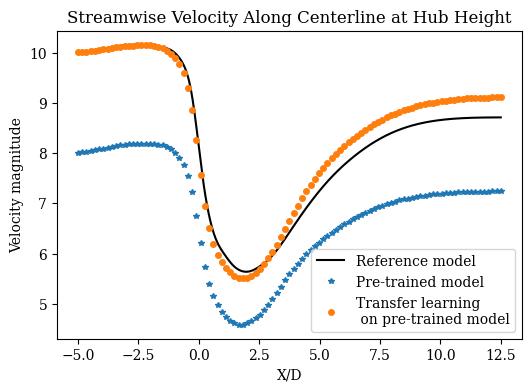

In [4]:
u_reference = np.sqrt(np.square(reference_model_pred[0])+np.square(reference_model_pred[1])+np.square(reference_model_pred[2]))
u_pretrained = np.sqrt(np.square(pretrained_model_pred[0])+np.square(pretrained_model_pred[1])+np.square(pretrained_model_pred[2]))
u_transfer = np.sqrt(np.square(transfer_learned_model_pred[0])+np.square(transfer_learned_model_pred[1])+np.square(transfer_learned_model_pred[2]))
plt.figure(figsize=(6,4))
x_data = np.linspace(-5,12.5,1001)
title = 'Streamwise Velocity Along Centerline at Hub Height'
plt.plot(x_data,u_reference,'-k',markersize=4,alpha=1,markevery=10,label = 'Reference model')
plt.plot(x_data,u_pretrained,'*',markersize=4,alpha=1,markevery=10,label = 'Pre-trained model')
plt.plot(x_data,u_transfer,'o',markersize=4,alpha=1,markevery=10, label = 'Transfer learning \n on pre-trained model')
plt.title(title)
plt.xlabel('X/D')
plt.ylabel('Velocity magnitude')
plt.legend(fontsize='10',frameon=True)

plt.savefig(f'Plots/{title}.png',dpi=300, bbox_inches='tight')



# Streamwise Pressure Along Centerline at Hub Height

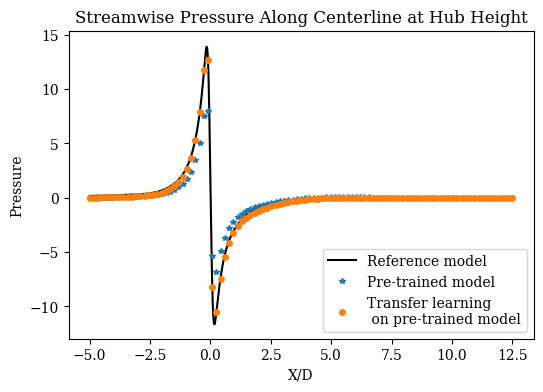

In [5]:
plt.figure(figsize=(6,4))

title = 'Streamwise Pressure Along Centerline at Hub Height'
plt.plot(x_data,reference_model_pred[3],'-k',markersize=4,alpha=1,markevery=10,label = 'Reference model')
plt.plot(x_data,pretrained_model_pred[3],'*',markersize=4,alpha=1,markevery=10,label = 'Pre-trained model')
plt.plot(x_data,transfer_learned_model_pred[3],'o',markersize=4,alpha=1,markevery=10, label = 'Transfer learning \n on pre-trained model')
plt.title(title)
plt.xlabel('X/D')
plt.ylabel('Pressure')
plt.legend(loc='lower right')

plt.savefig(f'Plots/{title}.png',dpi=300, bbox_inches='tight')